In [25]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as py

In [6]:
menu = pd.read_csv("./data/menu-15.csv")

In [12]:
# Only keeping numerical columns  
temp = menu.iloc[:,3:]

In [134]:
# Correlation matrix
corrMatrix = temp.corr()

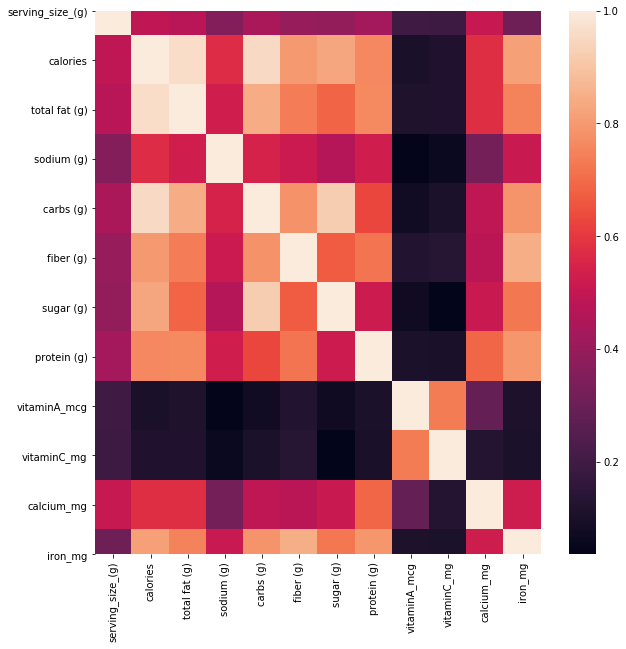

In [27]:
# Correlation heatmap of all the numerical values
fig, ax = py.subplots(figsize =  (10,10))
sn.heatmap(corrMatrix, annot=False)

In [38]:
# Only taking variables with some correlation with the other variables.
# We took out vitiman A and vitamin C as they had little to no correlation with the other variables
tempCorr = corrMatrix.iloc[[0,1,2,3,4,5,6,7,10,11],[0,1,2,3,4,5,6,7,10,11]]

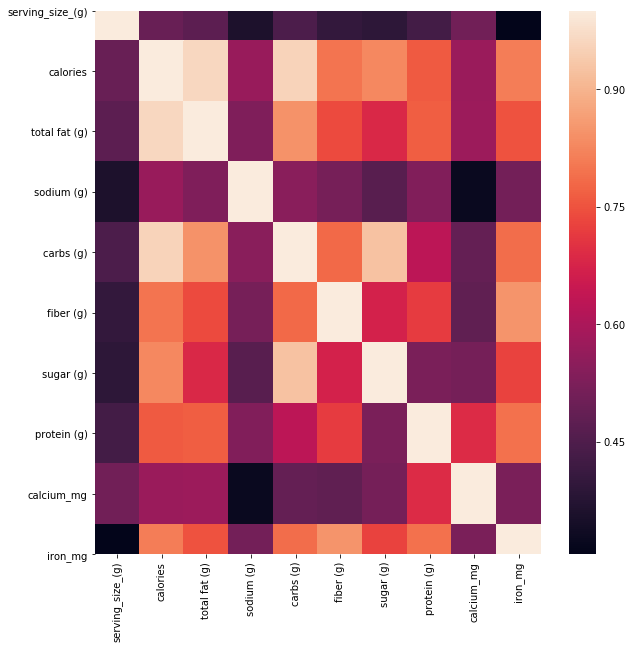

In [42]:
# An updated heatmap without vitamins
fig, ax2 = py.subplots(figsize =  (10,10))
sn.heatmap(tempCorr, annot=False)

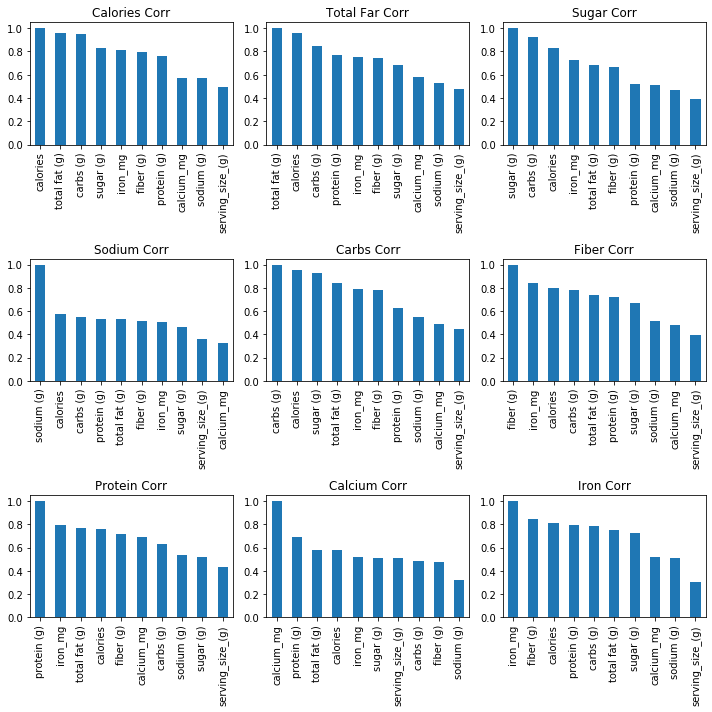

In [136]:
# Side by side correlations for each variable
fig, ax3 = py.subplots(3,3, figsize = (10,10))
tempCorr["calories"].sort_values()[::-1].plot.bar(ax = ax3[0,0])
ax3[0,0].set_title("Calories Corr")
tempCorr["total fat (g)"].sort_values()[::-1].plot.bar(ax = ax3[0,1])
ax3[0,1].set_title("Total Far Corr")
tempCorr["sodium (g)"].sort_values()[::-1].plot.bar(ax = ax3[1,0])
ax3[1,0].set_title("Sodium Corr")
tempCorr["carbs (g)"].sort_values()[::-1].plot.bar(ax = ax3[1,1])
ax3[1,1].set_title("Carbs Corr")
tempCorr["fiber (g)"].sort_values()[::-1].plot.bar(ax = ax3[1,2])
ax3[1,2].set_title("Fiber Corr")
tempCorr["sugar (g)"].sort_values()[::-1].plot.bar(ax = ax3[0,2])
ax3[0,2].set_title("Sugar Corr")
tempCorr["protein (g)"].sort_values()[::-1].plot.bar(ax = ax3[2,0])
ax3[2,0].set_title("Protein Corr")
tempCorr["calcium_mg"].sort_values()[::-1].plot.bar(ax = ax3[2,1])
ax3[2,1].set_title("Calcium Corr")
tempCorr["iron_mg"].sort_values()[::-1].plot.bar(ax = ax3[2,2])
ax3[2,2].set_title("Iron Corr")
py.tight_layout()


In [82]:
menu_lowercalories1 = menu[(menu['calories'] < 600)]
menu_lowercalories = menu_lowercalories1[(menu_lowercalories1['serving_size_(g)'] < 600)]

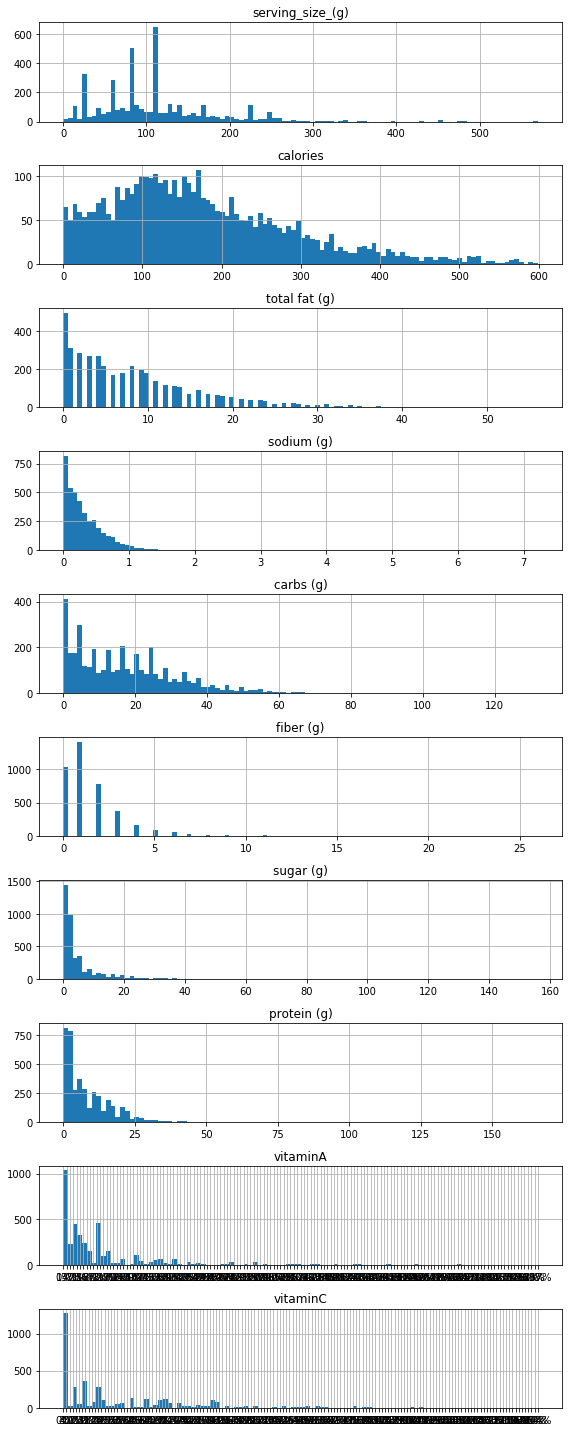

In [83]:
fig, ax4 = py.subplots(10, figsize = (8, 20))
index = 0
for i in range(3, 13):
    menu_lowercalories.iloc[:,i].hist(bins = 100, ax = ax4[index])
    ax4[index].set_title(str(menu_lowercalories.columns[i]))
    index = index + 1
py.tight_layout()
py.show()

In [97]:
scatterplot1 = temp.iloc[0:-1:10,[0,1,2,3,4,5,6,7,10,11]]

In [128]:
scatterplot2 = scatterplot1[scatterplot1['calories'] < 600]
scatterplot = scatterplot2[scatterplot2['serving_size_(g)'] < 2000]
scatterplot["healthy1"] = np.where(scatterplot["total fat (g)"] > 7, "no", "yes")
scatterplot["healthy2"] = np.where(scatterplot["sugar (g)"] > 2, "no", "yes")

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [130]:
scatterplot["healthy1"].head()

0     yes
10     no
20    yes
30     no
40     no
Name: healthy1, dtype: object

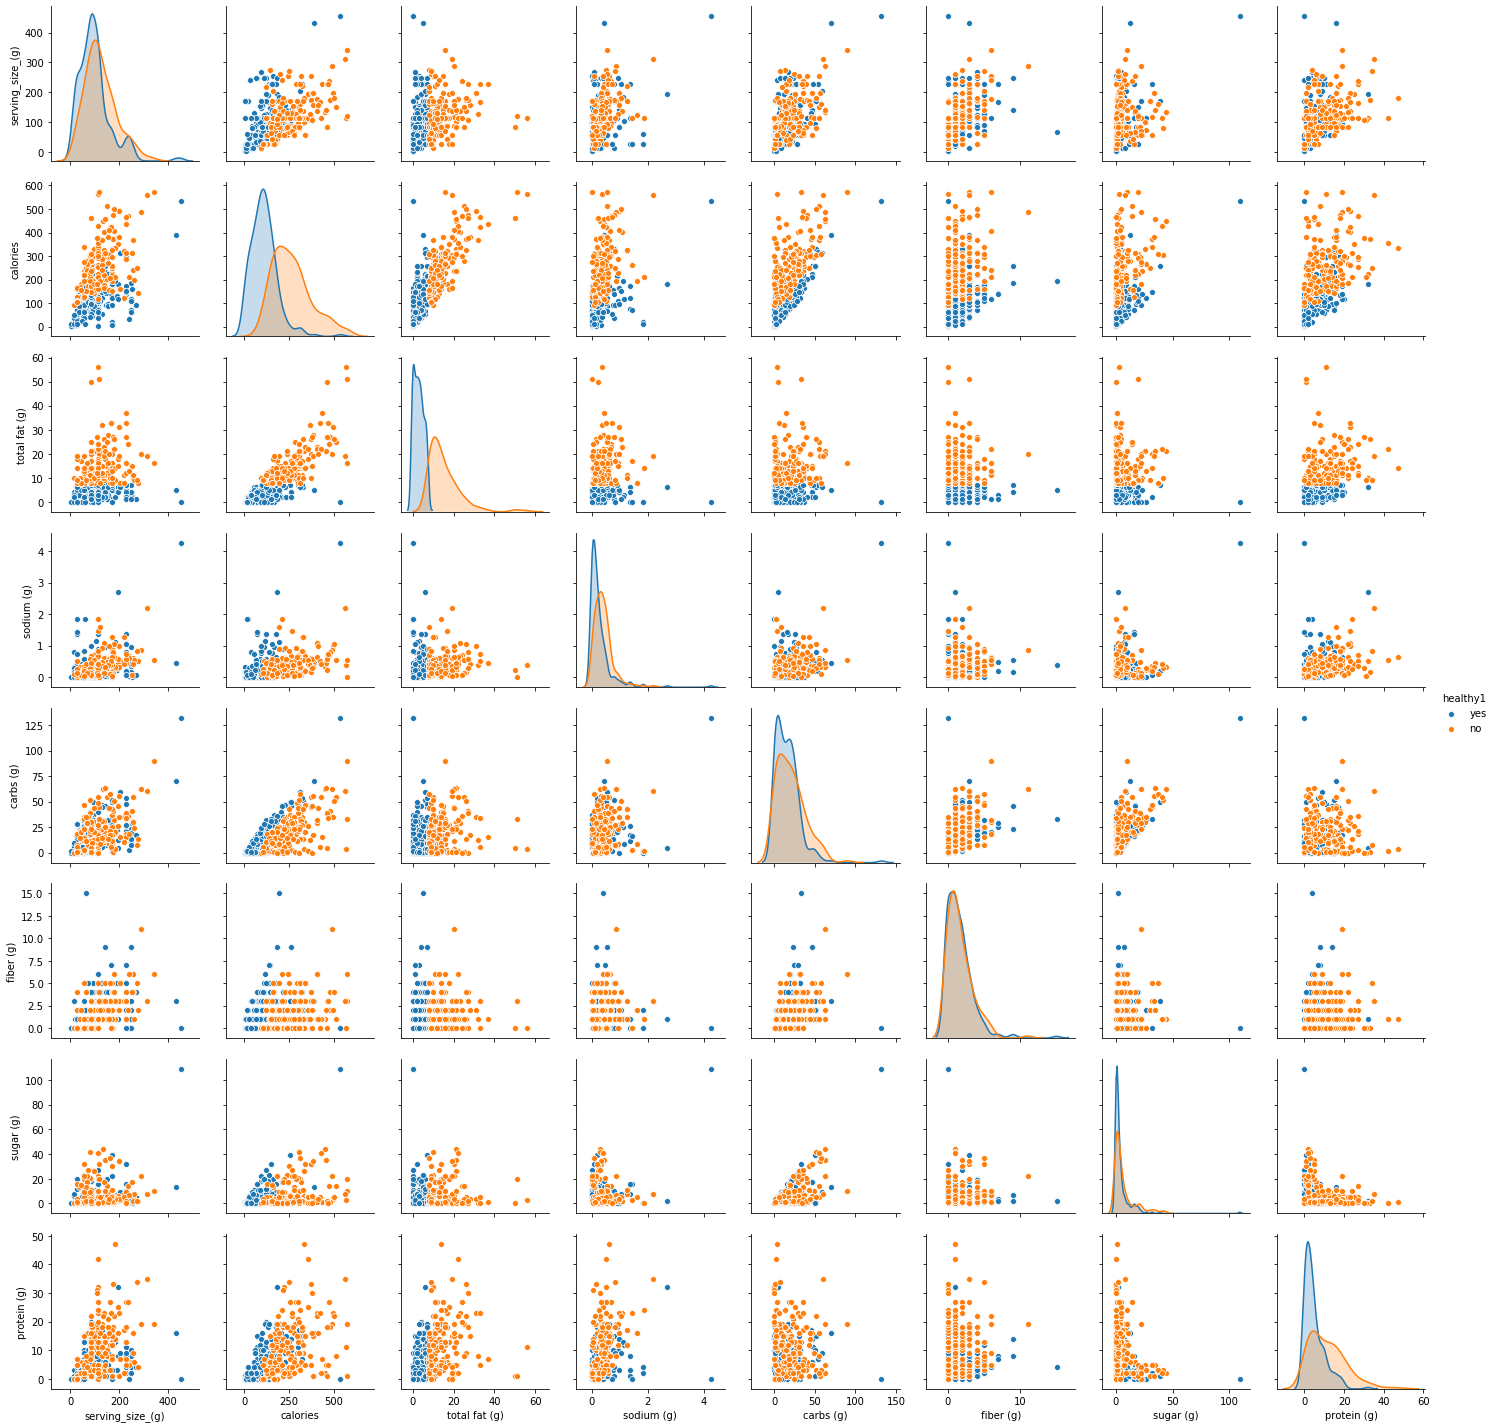

In [133]:
sn.pairplot(scatterplot, hue = "healthy1")

In [126]:
menu["total fat (g)"].describe()

count    4140.000000
mean       13.155556
std        60.014216
min         0.000000
25%         2.000000
50%         7.000000
75%        13.000000
max      2205.000000
Name: total fat (g), dtype: float64

In [102]:
scatterplot["serving_size_(g)"].sort_values()

3530       3.0
1380       4.0
2760      14.0
3450      14.0
3070      14.0
         ...  
4060     312.0
3590     340.0
3150     431.0
4110     454.0
3990    3765.0
Name: serving_size_(g), Length: 394, dtype: float64

In [109]:
menu.iloc[(3990)]

Unnamed: 0                 Ice Water
serving_size          Gallon (3765g)
serving_size_units            Gallon
serving_size_(g)                3765
calories                           0
total fat (g)                      0
sodium (g)                         0
carbs (g)                          0
fiber (g)                          0
sugar (g)                          0
protein (g)                        0
vitaminA                          0%
vitaminC                          0%
calcium                           0%
iron                              0%
vitaminA_mcg                       0
vitaminC_mg                        0
calcium_mg                         0
iron_mg                            0
Name: 3990, dtype: object